<a href="https://colab.research.google.com/github/iamdinithi/software-defect-prediction-model/blob/main/software_defect_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Software Defect Prediction Model**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#import data
data = pd.read_csv('kc1.csv')

**Inspect Structure and Content of the Dataset**

In [ ]:
# Get information about the dataset (columns, data types, non-null values)
print("Dataset Information:")
data.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2109 entries, 0 to 2108
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc                2109 non-null   float64
 1   v(g)               2109 non-null   float64
 2   ev(g)              2109 non-null   float64
 3   iv(g)              2109 non-null   float64
 4   n                  2109 non-null   float64
 5   v                  2109 non-null   float64
 6   l                  2109 non-null   float64
 7   d                  2109 non-null   float64
 8   i                  2109 non-null   float64
 9   e                  2109 non-null   float64
 10  b                  2109 non-null   float64
 11  t                  2109 non-null   float64
 12  lOCode             2109 non-null   int64  
 13  lOComment          2109 non-null   int64  
 14  lOBlank            2109 non-null   int64  
 15  locCodeAndComment  2109 non-null   int64  
 16  uni

**Check Missing Values**

In [ ]:
# Check for missing values in each column
print("Missing Values:")
print(data.isnull().sum())

Missing Values:
loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
defects              0
dtype: int64


In [ ]:
data.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1.0,1.0,1.0,1.0,1.0,True
2,83.0,11.0,1.0,11.0,171.0,927.89,0.04,23.04,40.27,21378.61,...,65,10,6,0,18.0,25.0,107.0,64.0,21.0,True
3,46.0,8.0,6.0,8.0,141.0,769.78,0.07,14.86,51.81,11436.73,...,37,2,5,0,16.0,28.0,89.0,52.0,15.0,True
4,25.0,3.0,1.0,3.0,58.0,254.75,0.11,9.35,27.25,2381.95,...,21,0,2,0,11.0,10.0,41.0,17.0,5.0,True


In [ ]:
# descriptive statistics of a DataFrame's numeric columns
data.describe()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
count,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,...,2109.00000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000
mean,20.372262,2.838028,1.674443,2.546420,49.829445,258.696719,0.319583,6.771242,21.240071,5242.386240,...,291.24504,14.525367,0.945946,1.759602,0.132764,7.631674,9.537316,31.043717,18.786724,4.665908
std,29.754442,3.900763,2.200659,3.375859,83.599874,516.317605,0.317029,7.863646,21.500367,17444.981211,...,969.16516,24.188302,3.085271,3.856850,0.704023,5.730347,12.195727,51.776056,32.074398,7.792206
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3.000000,1.000000,1.000000,1.000000,4.000000,8.000000,0.080000,1.500000,5.330000,12.000000,...,0.67000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,3.000000,1.000000,1.000000
50%,9.000000,1.000000,1.000000,1.000000,16.000000,57.060000,0.200000,3.500000,14.400000,213.970000,...,11.89000,5.000000,0.000000,0.000000,0.000000,6.000000,5.000000,10.000000,6.000000,1.000000
75%,24.000000,3.000000,1.000000,3.000000,58.000000,265.930000,0.670000,9.200000,29.850000,2276.020000,...,126.45000,17.000000,0.000000,2.000000,0.000000,11.000000,13.000000,36.000000,22.000000,5.000000
max,288.000000,45.000000,26.000000,45.000000,1106.000000,7918.820000,2.000000,53.750000,193.060000,324803.510000,...,18044.64000,262.000000,44.000000,58.000000,12.000000,37.000000,120.000000,678.000000,428.000000,89.000000


### **Data Preprocessing**

Class Distribution Check and Applying SMOTE

The *Dataset* contains a large disparity between True/False in defects column

No Defects (False): 84.54%
Defects (True): 15.46%

Therefore apply resampling techniques -SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
# Separate features and target variable
X = data.drop('defects', axis=1)
y = data['defects']

In [ ]:
# Check original class distribution
print("Original Class Distribution:")
print(y.value_counts(normalize=True) * 100)

Original Class Distribution:
defects
False    84.542437
True     15.457563
Name: proportion, dtype: float64


In [ ]:
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
# Check new class distribution
print("Class distribution after applying SMOTE:")
print(y_resampled.value_counts(normalize=True) * 100)

Class distribution after applying SMOTE:
defects
False    50.0
True     50.0
Name: proportion, dtype: float64


**Check Feature Importance with Random Forest**

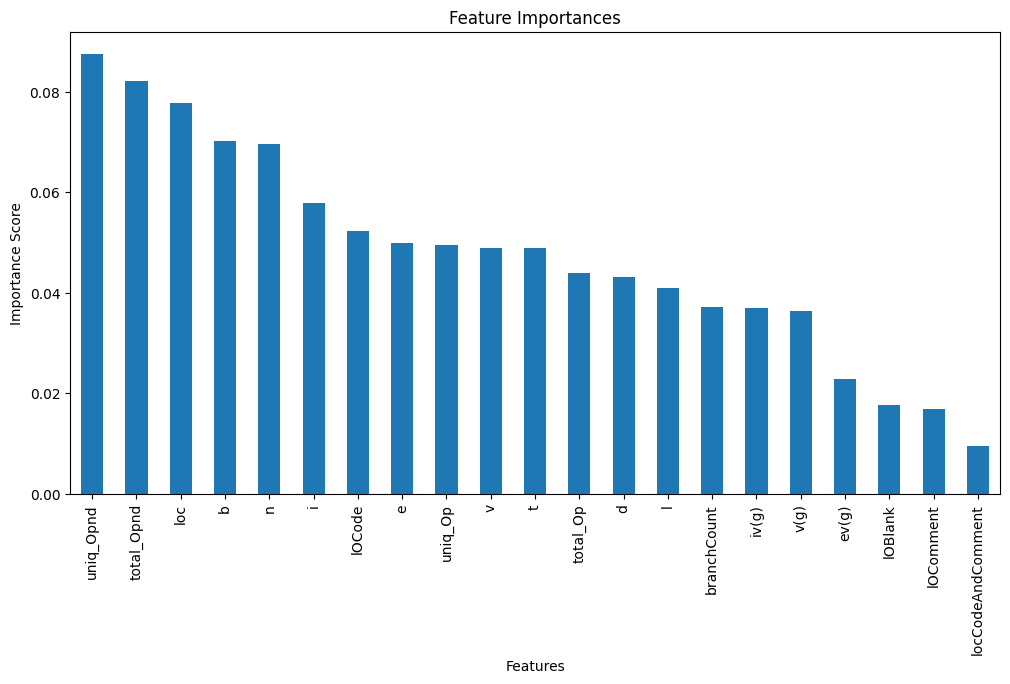

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest to assess feature importance
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_resampled, y_resampled)

# Get feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)

# Plot feature importances
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()


### **Detect Outliers**

**Using Visual Methods : boxplot**



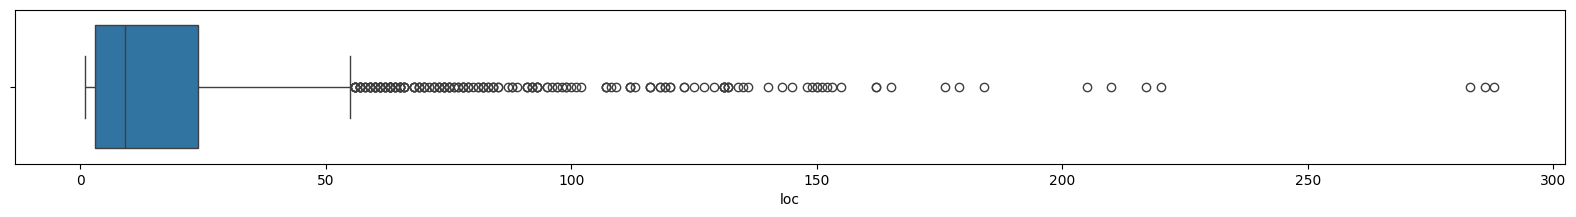

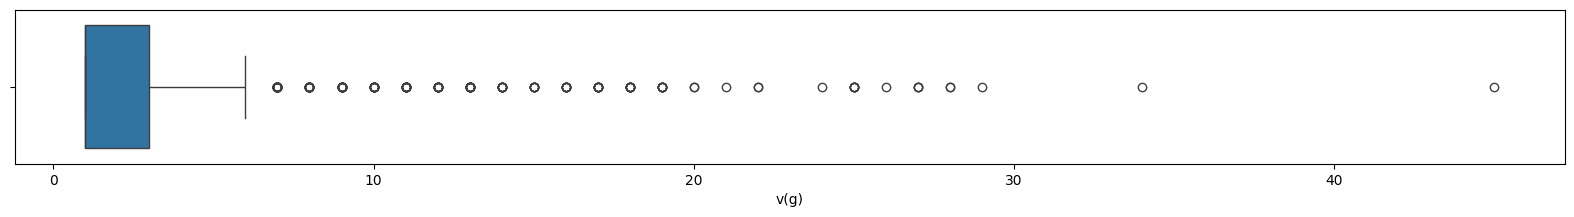

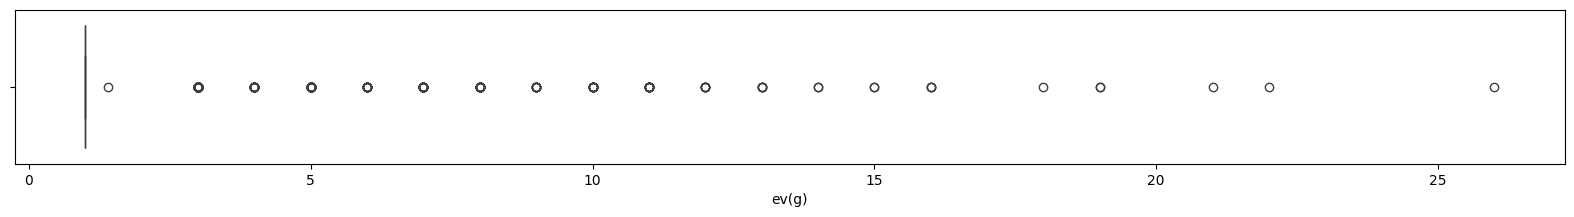

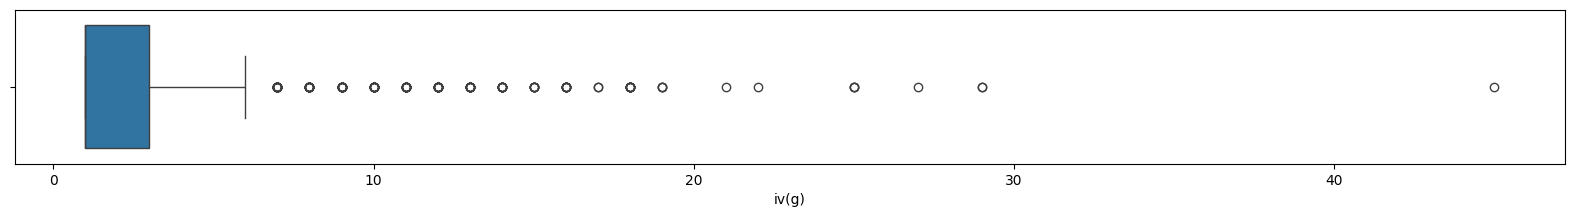

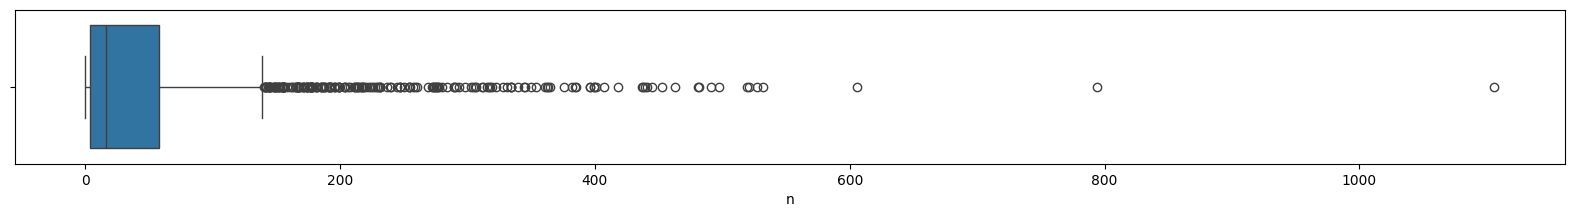

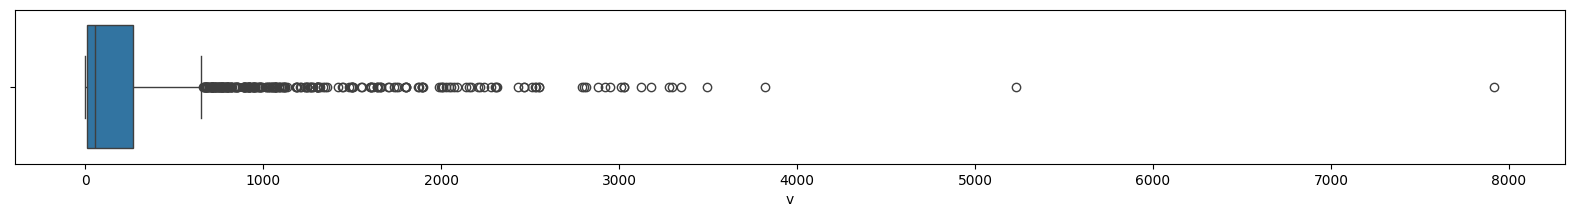

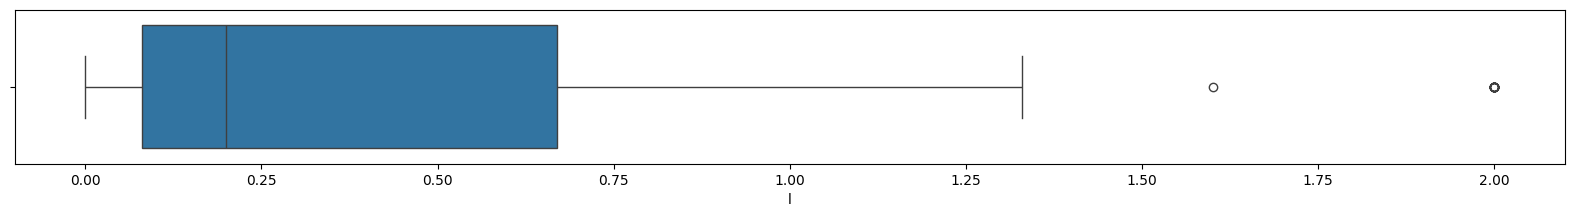

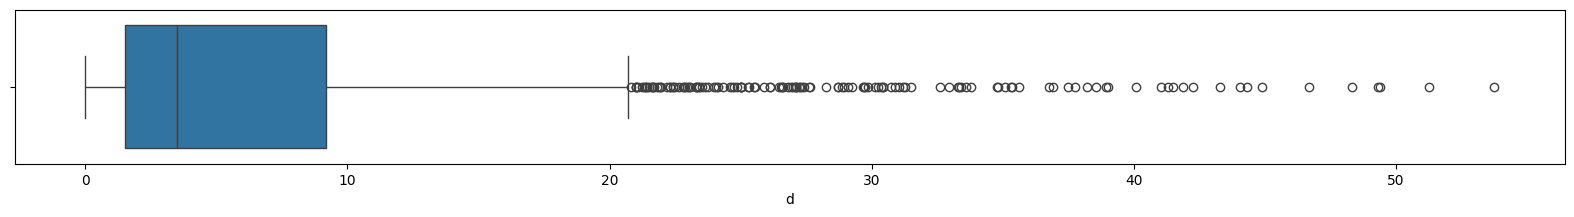

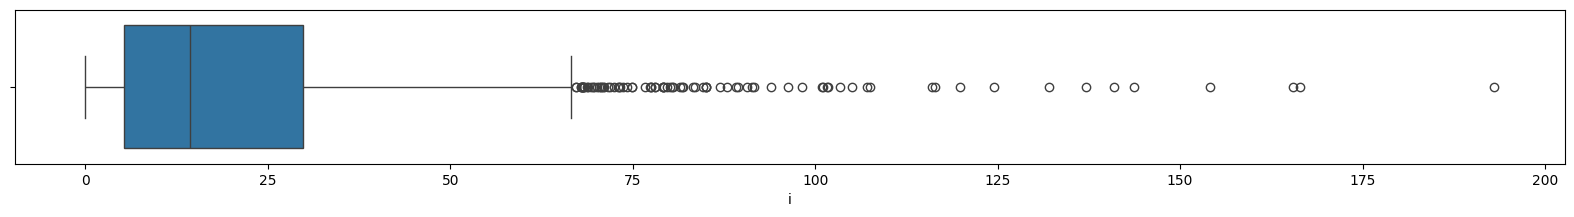

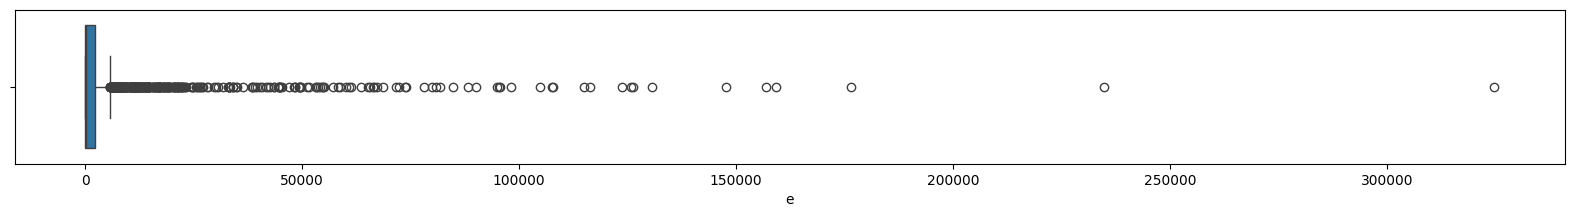

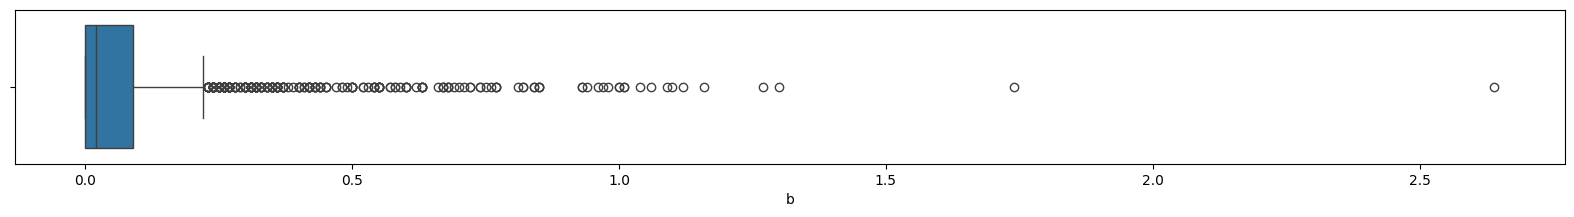

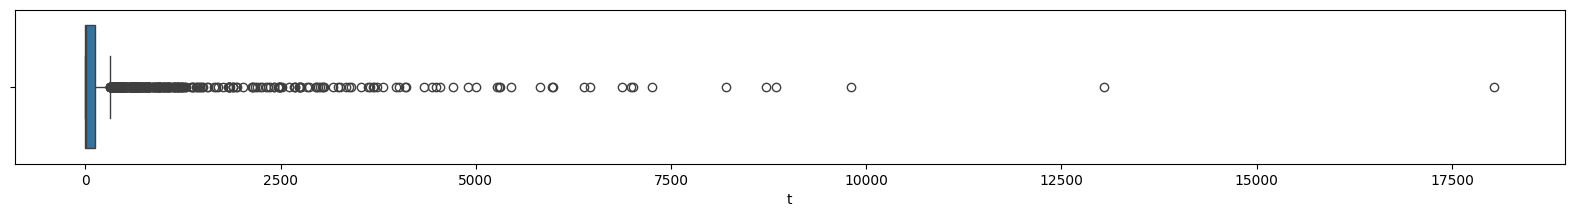

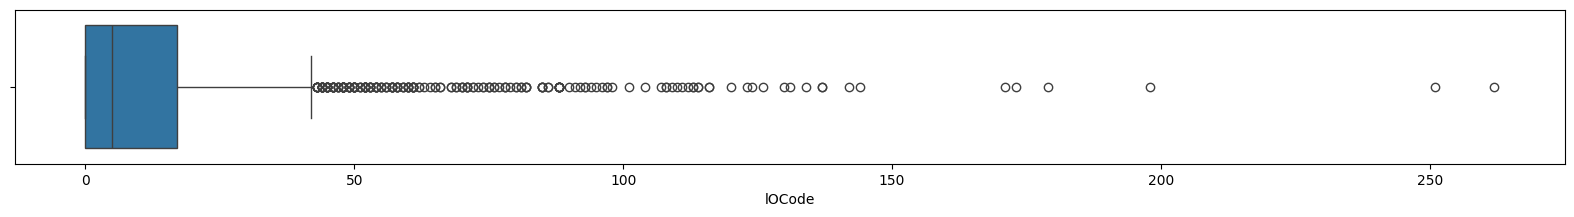

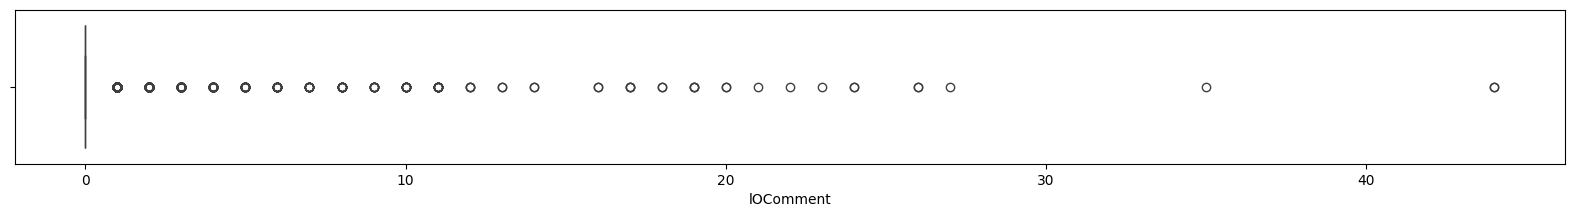

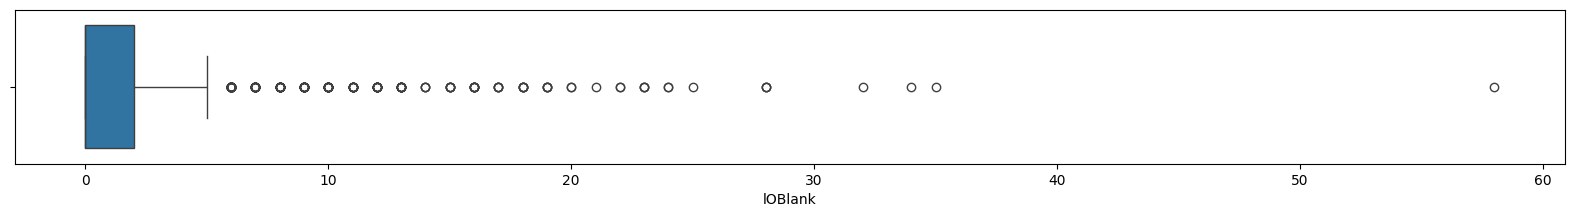

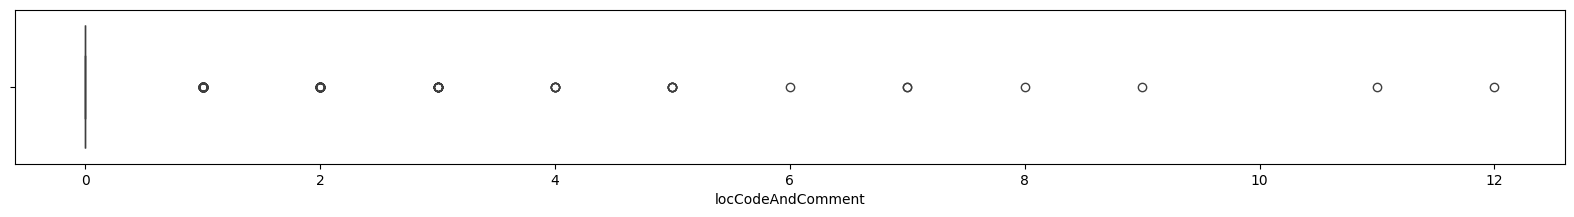

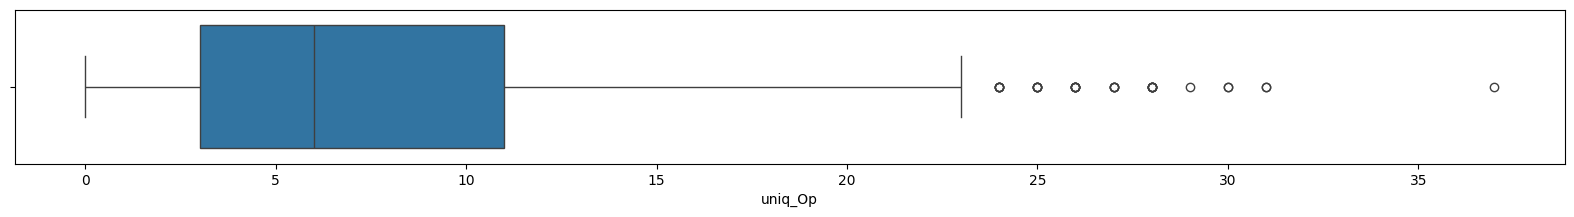

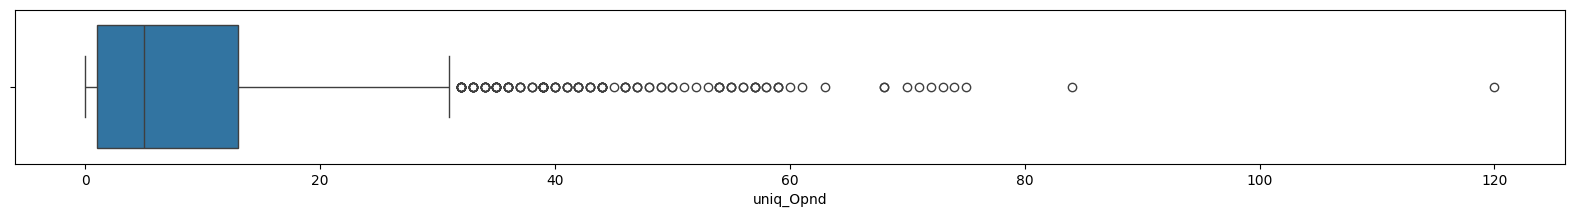

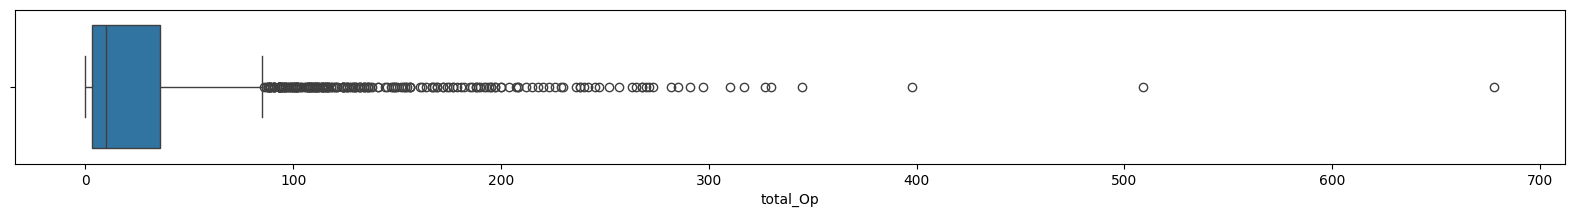

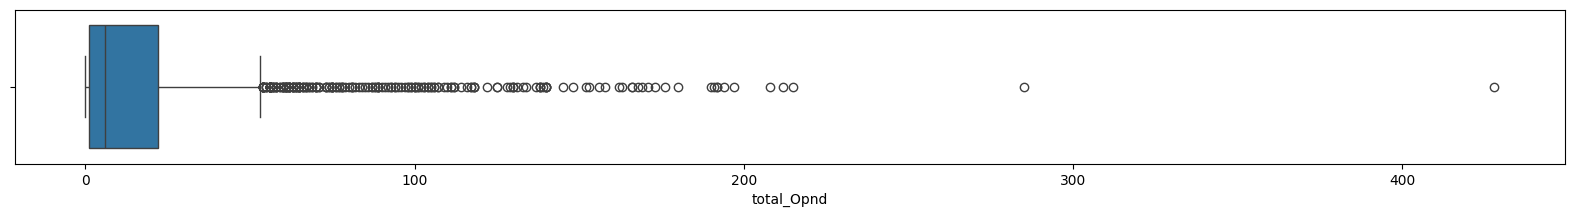

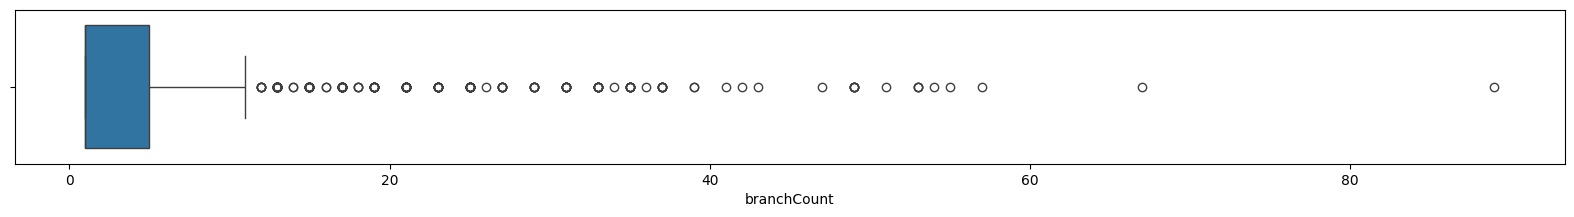

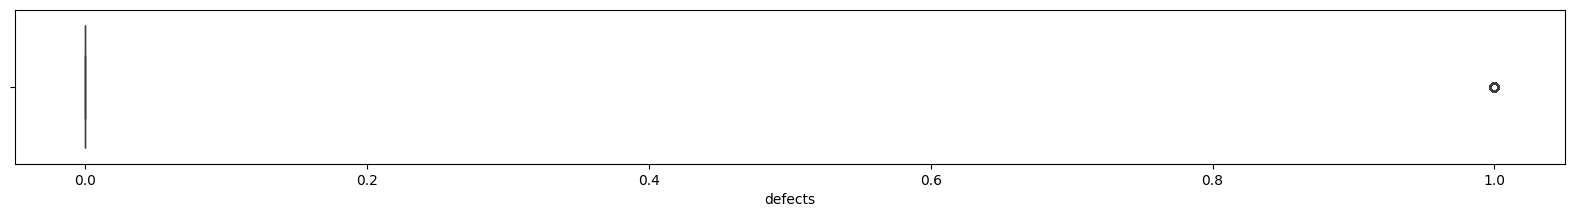

In [ ]:
for column in data:
  plt.figure(figsize=(20,2))
  sns.boxplot(data=data,x=column)

### **Drop columns based on low impact features**

Consider dropping the following dataset columns as per the Feature Importance chart above.

*   locCodeAndComment
*   lOBlank
*   lOComment

In [ ]:
# Drop the specified columns from the resampled dataset
columns_to_drop = ['locCodeAndComment', 'lOBlank', 'lOComment']
X_resampled_cleaned = X_resampled.drop(columns=columns_to_drop)

# Verify the changes by displaying the first few rows
X_resampled_cleaned

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
0,1.100000,1.400000,1.400000,1.400000,1.300000,1.300000,1.300000,1.300000,1.300000,1.300000,1.300000,1.300000,2,1.200000,1.200000,1.200000,1.200000,1.400000
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1,1.000000,1.000000,1.000000,1.000000,1.000000
2,83.000000,11.000000,1.000000,11.000000,171.000000,927.890000,0.040000,23.040000,40.270000,21378.610000,0.310000,1187.700000,65,18.000000,25.000000,107.000000,64.000000,21.000000
3,46.000000,8.000000,6.000000,8.000000,141.000000,769.780000,0.070000,14.860000,51.810000,11436.730000,0.260000,635.370000,37,16.000000,28.000000,89.000000,52.000000,15.000000
4,25.000000,3.000000,1.000000,3.000000,58.000000,254.750000,0.110000,9.350000,27.250000,2381.950000,0.080000,132.330000,21,11.000000,10.000000,41.000000,17.000000,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3561,63.865548,5.000000,1.933216,3.466608,136.867314,747.950908,0.070000,14.343322,52.152866,10726.750628,0.250668,595.933961,44,14.933216,29.399823,80.333922,56.533392,9.000000
3562,36.099661,5.183277,1.733107,4.183277,90.099661,459.950273,0.050000,20.125085,22.911722,9243.068610,0.153666,513.503719,29,18.549830,15.916384,55.733107,34.366554,9.366554
3563,25.415076,4.865231,2.865231,3.932615,64.347691,326.082703,0.061348,15.584720,21.105218,5063.918714,0.111348,281.328930,19,18.595693,15.067385,39.010768,25.336923,8.730462
3564,98.225215,10.324356,3.450430,10.324356,275.450430,1603.191014,0.030000,30.585582,52.425593,49034.995520,0.533874,2724.165362,86,21.000000,35.549570,171.963896,103.486533,19.648711


### **Train the Dataset with Outliers using Logistic Regression**

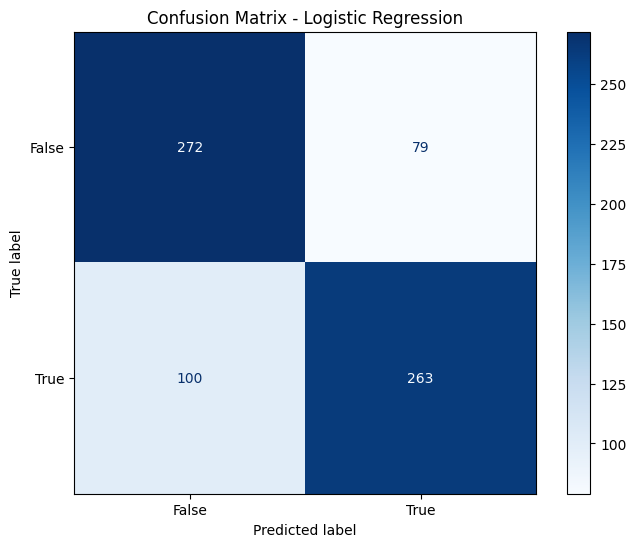

Accuracy: 0.75
Precision: 0.77
Recall: 0.72
F1-Score: 0.75

Confusion Matrix:
 [[272  79]
 [100 263]]


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Split the resampled dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled_cleaned, y_resampled,
                                                    test_size=0.2, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Plot the Confusion Matrix
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, ax=ax, cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# Calculate the performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

## **Traning the Dataset without Outliers using Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Define a function to remove outliers using the IQR method
def remove_outliers_iqr(df):
    cleaned_df = df.copy()
    for column in cleaned_df.columns:
        Q1 = cleaned_df[column].quantile(0.25)
        Q3 = cleaned_df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Keep only the values within the IQR range
        cleaned_df = cleaned_df[(cleaned_df[column] >= lower_bound) & (cleaned_df[column] <= upper_bound)]
    return cleaned_df

# Remove outliers from the dataset
X_resampled_no_outliers = remove_outliers_iqr(X_resampled_cleaned)

# Align the target variable with the cleaned feature set
y_resampled_no_outliers = y_resampled.loc[X_resampled_no_outliers.index]

# Split the cleaned dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled_no_outliers, y_resampled_no_outliers, test_size=0.2, random_state=42
)

# Train the Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)


Accuracy: 0.78
Precision: 0.50
Recall: 0.25
F1-Score: 0.33

Confusion Matrix:
 [[194  15]
 [ 45  15]]


### **Traning the Dataset without Outliers using Random forest**

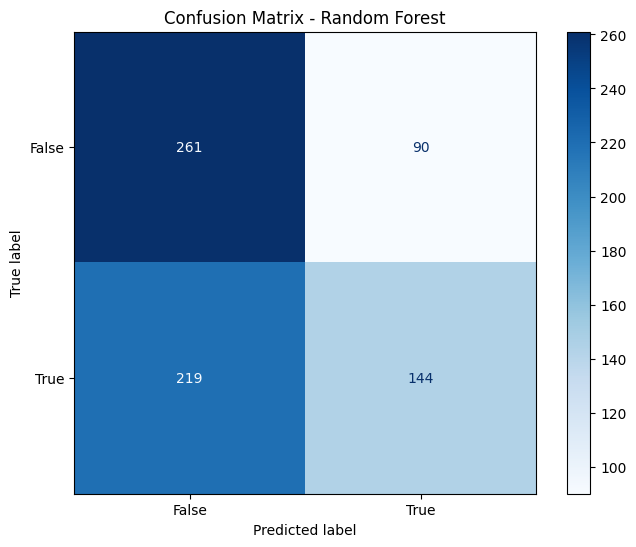

Accuracy: 0.90
Precision: 0.89
Recall: 0.92
F1-Score: 0.90

Confusion Matrix:
 [[311  40]
 [ 30 333]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE

# Separate features and target variable
X = data.drop('defects', axis=1)
y = data['defects']

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Drop unnecessary columns
columns_to_drop = ['locCodeAndComment', 'lOBlank', 'lOComment']
X_resampled_cleaned = X_resampled.drop(columns=columns_to_drop)

# Split the cleaned dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled_cleaned, y_resampled, test_size=0.2, random_state=42
)

# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Plot the Confusion Matrix
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, ax=ax, cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.show()

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the performance metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)